In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Get a list of column names and types for measuremnts
measurment_columns = inspector.get_columns('measurement')
for c in measurment_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Get a list of column names and types for station
station_columns = inspector.get_columns('measurement')
for c in station_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

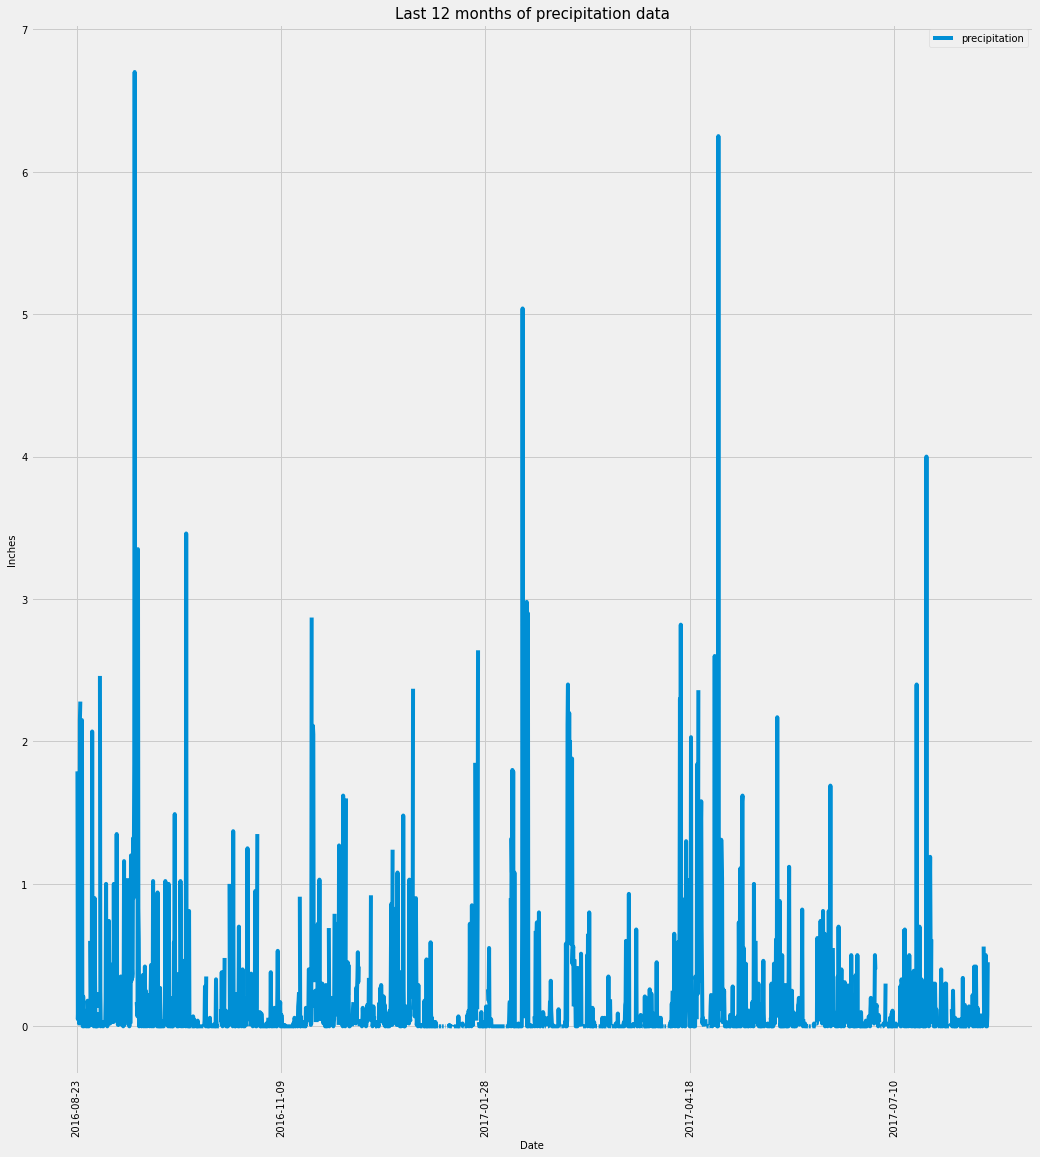

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(result,columns=['date', 'precipitation'])

# Sort the dataframe by date
df1 = df1.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

df1.plot(x='date', y = 'precipitation', rot = 90, fontsize = 10)
plt.title("Last 12 months of precipitation data", fontsize=15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Inches', fontsize= 10)
plt.legend(loc ="upper right", fontsize=10)
plt.tight_layout
plt.rcParams["figure.figsize"] = (20,20)
plt.savefig("Homework_Images/Last 12 months of precipitation data.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

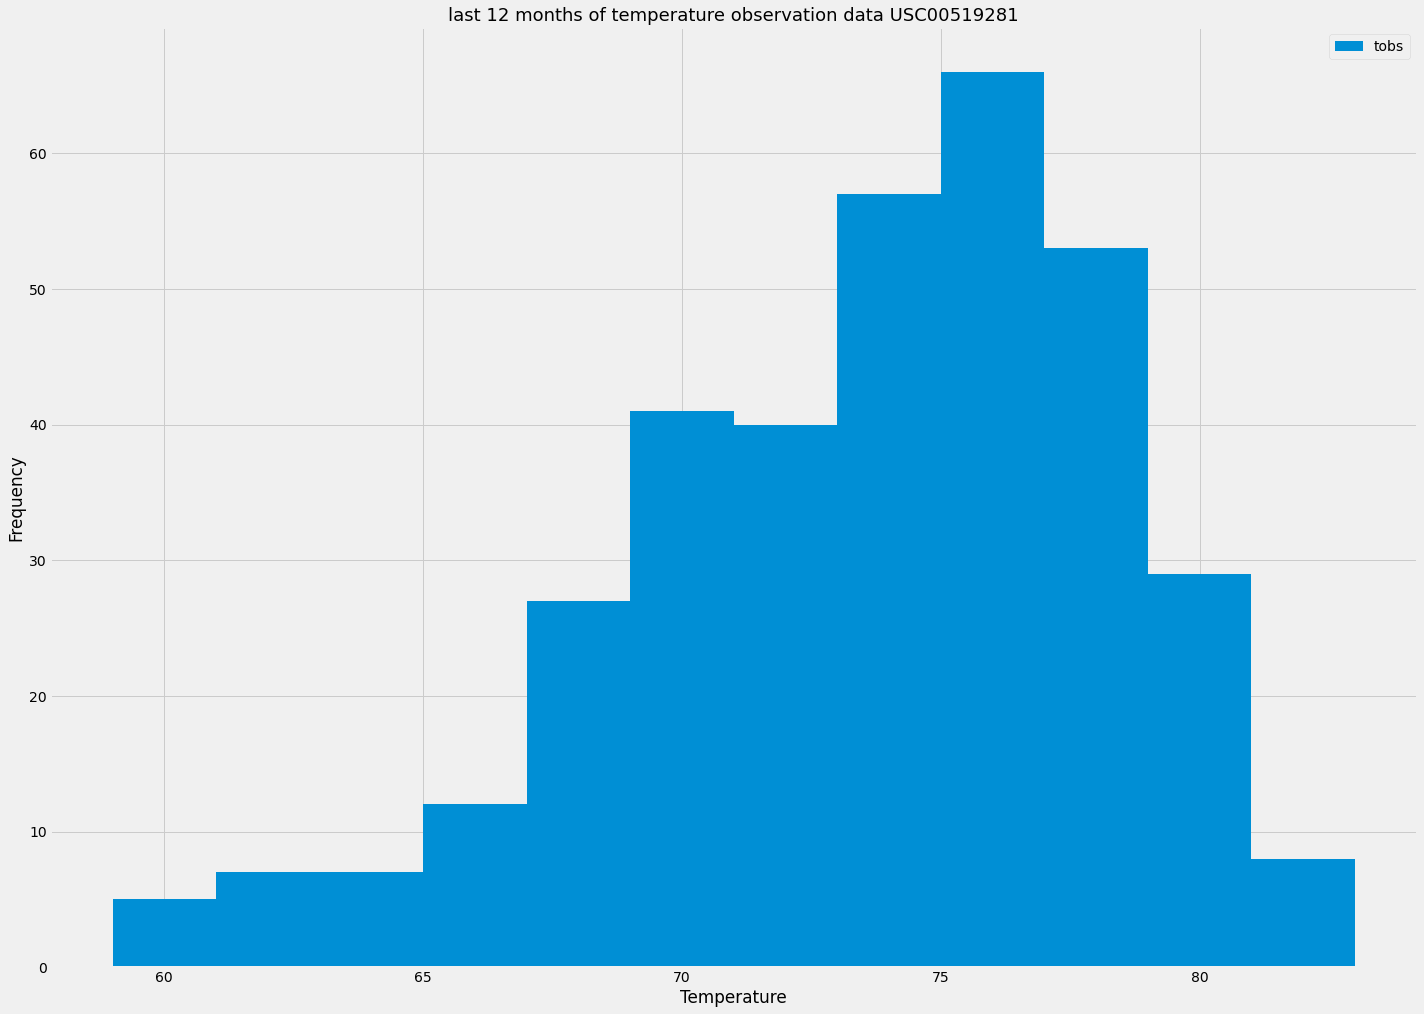

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

previous_year_1 = dt.date(2017,8,23)-dt.timedelta(days=365)

result1 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= previous_year_1).all()
df2 = pd.DataFrame(result1, columns=['tobs'])

df2.plot.hist(bins=12)

plt.title("last 12 months of temperature observation data USC00519281", fontsize=18)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,20)
plt.xlabel("Temperature")
plt.savefig("Homework_Images/last 12 months of temperature observation data USC00519281.png")
plt.show()

# Close session

In [56]:
# Close Session
session.close()